In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


**Identify the output variable.**

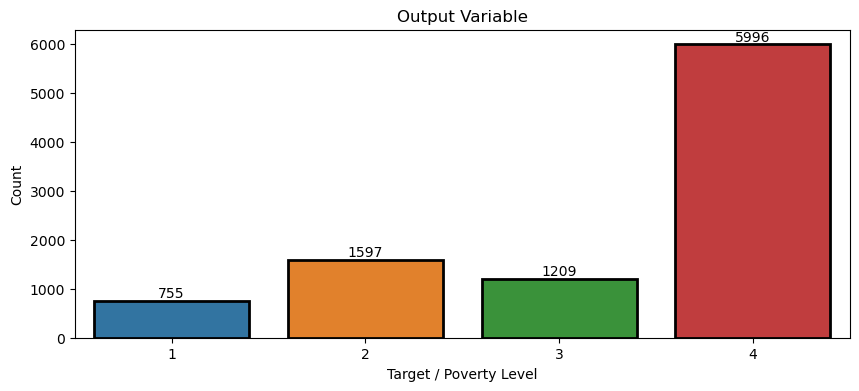

In [4]:
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(train_data['Target'],ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('Target / Poverty Level')
plt.title('Output Variable')
plt.show()

**Understand the type of data.**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
datatype = ['float','int','object']
def datatypes(X):
    for i in datatype:
        print(f'DATA TYPE {i.upper()}: {len(X.select_dtypes(i).columns)}')
        print(X.select_dtypes(i).columns)

In [7]:
datatypes(train_data)

DATA TYPE FLOAT: 8
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')
DATA TYPE INT: 130
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)
DATA TYPE OBJECT: 5
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [8]:
train_data.select_dtypes('object')['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [9]:
train_data.select_dtypes('object')['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [10]:
train_data.select_dtypes('object')['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [11]:
# Changing categorical data to numerical 
train_data['dependency'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
train_data['edjefe'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
train_data['edjefa'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
train_data['dependency'] = train_data['dependency'].astype('float')
train_data['edjefe'] = train_data['edjefe'].astype('float')
train_data['edjefa'] = train_data['edjefa'].astype('float')
datatypes(train_data)

DATA TYPE FLOAT: 11
Index(['v2a1', 'v18q1', 'rez_esc', 'dependency', 'edjefe', 'edjefa',
       'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency',
       'SQBmeaned'],
      dtype='object')
DATA TYPE INT: 130
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)
DATA TYPE OBJECT: 2
Index(['Id', 'idhogar'], dtype='object')


**Check if there are any biases in your dataset.**

In [12]:
contingency_tab=pd.crosstab(train_data['r4t3'],train_data['hogar_total'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


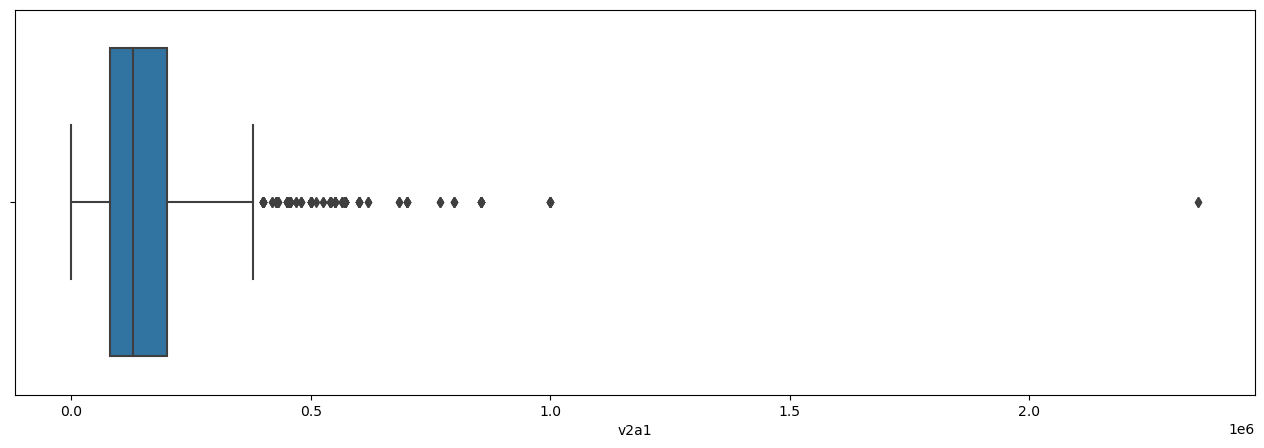

In [13]:
plt.figure(figsize=(16,5))
sns.boxplot(train_data['v2a1'])
plt.show()

In [14]:
print(train_data['v18q'].sum())
print(train_data['v18q1'].sum())
print('Therefore,variables v18q,v18q1 have relationship between them. For good result we can use any one of them.')
train_data[['v18q','v18q1']].corr()

2215
3110.0
Therefore,variables v18q,v18q1 have relationship between them. For good result we can use any one of them.


,v18q,v18q1
v18q,1.0,NaN
v18q1,NaN,1.0


**Check whether all members of the house have the same poverty level.**

In [15]:
idhogar_list = list(train_data['idhogar'].unique())
Different_Poverty_Level = []
for i in idhogar_list:
    MULTIPLY = train_data[train_data['idhogar']==i]['Target'].iloc[0]*len(train_data[train_data['idhogar']==i])
    ADDITION = train_data[train_data['idhogar']==i]['Target'].sum()
    if MULTIPLY != ADDITION:
        Different_Poverty_Level.append(i)
print('Below are the few houses details where members do not have the same poverty level.')
print('___')
for i in Different_Poverty_Level[10:15]:
    print(train_data[train_data['idhogar']==i][['Id','idhogar','Target']])
print('___')
print(len(Different_Poverty_Level),'Houses have members with different poverty level')

Below are the few houses details where members do not have the same poverty level.
___
                Id    idhogar  Target
1689  ID_8234b6451  3c6973219       4
1690  ID_8761b8b29  3c6973219       4
1691  ID_17f894177  3c6973219       2
1692  ID_700ec94e3  3c6973219       4
                Id    idhogar  Target
2311  ID_114fbe5b3  0511912b6       4
2312  ID_e9478911c  0511912b6       4
2313  ID_a8947b31b  0511912b6       4
2314  ID_97297f485  0511912b6       3
                Id    idhogar  Target
3109  ID_4197d1421  f006348ed       3
3110  ID_06a29e4fa  f006348ed       3
3111  ID_8681c1ce5  f006348ed       2
3112  ID_7365e7b52  f006348ed       2
3113  ID_402ad06e7  f006348ed       2
                Id    idhogar  Target
3248  ID_fbab06c98  a20ff33ba       2
3249  ID_e40646e94  a20ff33ba       1
3250  ID_f8bf25528  a20ff33ba       2
3251  ID_021baf1e0  a20ff33ba       2
                Id    idhogar  Target
3320  ID_a8ab08091  5e9329fc6       3
3321  ID_b0b7f2e33  5e9329fc6       2
3

**Check if there is a house without a family head.**

In [16]:
idhogar_list = list(train_data['idhogar'].unique())
House_without_a_family_head = []
for i in idhogar_list:
    ADDITION = train_data[train_data['idhogar']==i]['parentesco1'].sum()
    if ADDITION == 0:
        House_without_a_family_head.append(i)
print('Below are the few houses without a family head.')
print('___')
for i in House_without_a_family_head[0:7]:
    print(train_data[train_data['idhogar']==i][['Id','idhogar','parentesco1']])
print('___')
print(len(House_without_a_family_head),'Houses are without family head')

Below are the few houses without a family head.
___
                Id    idhogar  parentesco1
4935  ID_717302050  09b195e7a            0
                Id    idhogar  parentesco1
4975  ID_ff6f13458  896fe6d3e            0
                Id    idhogar  parentesco1
5391  ID_64c9eabac  61c10e099            0
                Id    idhogar  parentesco1
5396  ID_8948b1f91  374ca5a19            0
                Id    idhogar  parentesco1
6443  ID_8ddb34d2c  bfd5067c2            0
6444  ID_03e2f23b0  bfd5067c2            0
                Id    idhogar  parentesco1
7086  ID_ba2ac56bb  1367ab31d            0
                Id    idhogar  parentesco1
7438  ID_7ba374a80  6b1b2405f            0
7439  ID_1bca5b5e5  6b1b2405f            0
7440  ID_622be4200  6b1b2405f            0
___
15 Houses are without family head


**Set poverty level of the members and the head of the house within a family.**

In [17]:
poverty = train_data[['v2a1','rooms','refrig','v18q','v18q1','hhsize','computer','qmobilephone','television','parentesco1','Id','idhogar']]
poverty.fillna(0,inplace=True) 

In [18]:
rent_median = poverty.v2a1[poverty['v2a1']!=0].median()
owned_elec_median = (poverty.rooms+poverty.refrig+poverty.v18q+poverty.v18q1+poverty.\
hhsize+poverty.computer+poverty.qmobilephone+poverty.television).median()
poverty['Owned'] = poverty.rooms+poverty.refrig+poverty.v18q+poverty.v18q1+poverty.\
hhsize+poverty.computer+poverty.qmobilephone+poverty.television
def poverty_rent(X):
    if X > rent_median:
        return 1
    else:
        return 0
def poverty_owned(X):
    if X > owned_elec_median:
        return 1
    else:
        return 0
def poverty_level(X):
    if X > 0:
        return 'Above Poverty'
    else:
        return 'Below Poverty'
poverty['Poverty_acc_rent'] = poverty['v2a1'].apply(poverty_rent)
poverty['Poverty_acc_owned'] = poverty['Owned'].apply(poverty_owned)
poverty['Poverty_Level'] = poverty['Poverty_acc_rent']+poverty['Poverty_acc_owned']
poverty['Poverty_Level'] = poverty['Poverty_Level'].apply(poverty_level)
poverty[['v2a1','Owned','Poverty_Level']].head(10)
print('As the data is skewed median was considered for poverty threshold')
print('Median for Rent amount',rent_median)
print('Median of Owned Stuff',owned_elec_median)

As the data is skewed median was considered for poverty threshold
Median for Rent amount 130000.0
Median of Owned Stuff 13.0


In [19]:
poverty['Head/Member'] = poverty['parentesco1'].replace(to_replace=[0,1],value=['Member','Head'])
for i in idhogar_list[110:115]:    
    print(poverty[poverty['idhogar']==i][['idhogar','Head/Member','parentesco1','Poverty_Level']].to_string(index=False))

  idhogar Head/Member  parentesco1 Poverty_Level
2f4baea07      Member            0 Above Poverty
2f4baea07        Head            1 Above Poverty
  idhogar Head/Member  parentesco1 Poverty_Level
01ff6a086        Head            1 Below Poverty
01ff6a086      Member            0 Below Poverty
  idhogar Head/Member  parentesco1 Poverty_Level
f623c549b      Member            0 Above Poverty
f623c549b        Head            1 Above Poverty
  idhogar Head/Member  parentesco1 Poverty_Level
bf1d89cb8      Member            0 Above Poverty
bf1d89cb8      Member            0 Above Poverty
bf1d89cb8      Member            0 Above Poverty
bf1d89cb8        Head            1 Above Poverty
  idhogar Head/Member  parentesco1 Poverty_Level
8e5f8c731      Member            0 Below Poverty
8e5f8c731        Head            1 Below Poverty


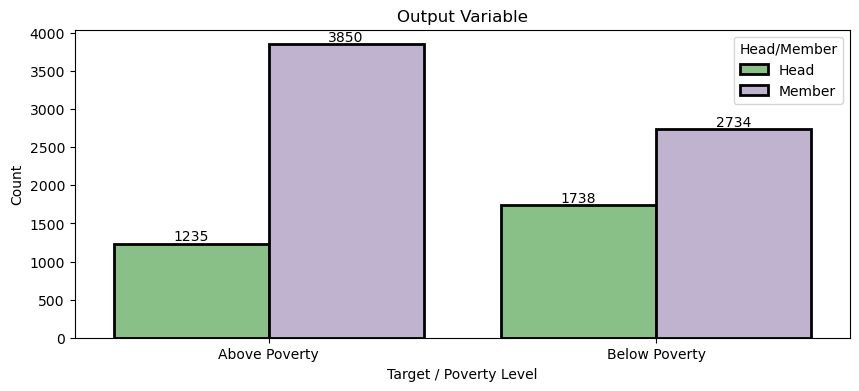

In [20]:
poverty.groupby('Head/Member')['Poverty_Level'].value_counts()
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(data=poverty,x='Poverty_Level',hue='Head/Member',ax=ax,ec='k',lw=2,palette='Accent')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel('Count')
plt.xlabel('Target / Poverty Level')
plt.title('Output Variable')
plt.show()

**Count how many null values are existing in columns.**

Column "v2a1" has 6860 number of null values or 71.78% of null values
Column "v18q1" has 7342 number of null values or 76.82% of null values
Column "rez_esc" has 7928 number of null values or 82.95% of null values
Column "meaneduc" has 5 number of null values or 0.05% of null values
Column "SQBmeaned" has 5 number of null values or 0.05% of null values


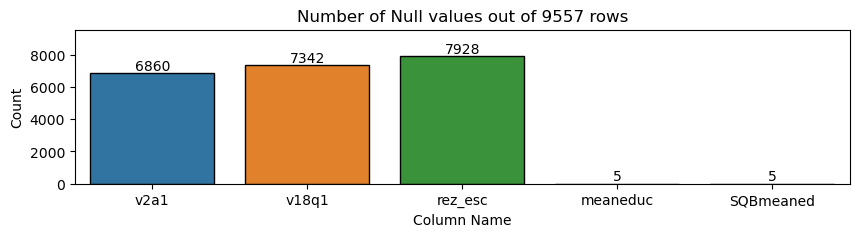

In [21]:
null_values = train_data.isnull().sum().to_dict()
x = []
y = []
for i,j in null_values.items():
    if j > 0:
        print(f'Column "{i}" has {j} number of null values or {round(j/train_data.shape[0]*100,2)}% of null values' )
        x.append(i)
        y.append(j)
fig,ax = plt.subplots(figsize=(10,2))
sns.barplot(x,y,ax=ax,ec='k',lw=1)
ax.bar_label(ax.containers[0])
plt.ylim(0,9557)
plt.xlabel('Column Name')
plt.ylabel('Count')
plt.title(f'Number of Null values out of {train_data.shape[0]} rows')
plt.show()

**Remove null value rows of the target variable.**

In [22]:
print(train_data['Target'].isnull().sum())
print('There are no null values in target variable')

0
There are no null values in target variable


In [23]:
train_data['v2a1'].fillna(0,inplace=True)
train_data['v18q1'].fillna(0,inplace=True)

In [24]:
train_data.drop(['tipovivi3', 'v18q','rez_esc','elimbasu5'],axis=1,inplace=True)

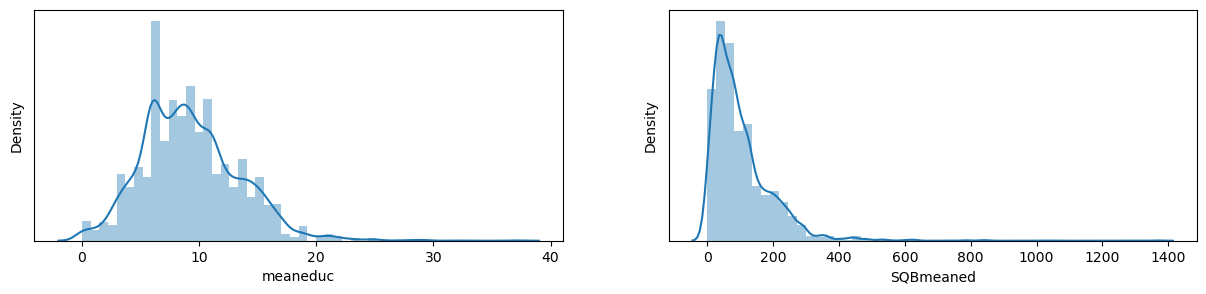

In [25]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(train_data['meaneduc'])
plt.yticks([])
plt.subplot(1,2,2)
sns.distplot(train_data['SQBmeaned'])
plt.yticks([])
plt.show()

In [26]:
print(np.mean(train_data['meaneduc']))
print(np.mean(train_data['SQBmeaned']))

9.231522935701433
102.58886699019641


In [27]:
print(train_data['meaneduc'].median())
print(train_data['SQBmeaned'].median())

9.0
81.0


In [28]:
train_data['meaneduc'].fillna(train_data['meaneduc'].median(),inplace=True)
train_data['SQBmeaned'].fillna(train_data['SQBmeaned'].median(),inplace=True)

In [29]:
# Checking for null values
train_data.isnull().sum().sum()

0

In [30]:
datatype = ['float','int','object']
def datatypes(X):
    for i in datatype:
        print(f'DATA TYPE {i.upper()}: {len(X.select_dtypes(i).columns)}')
        print(X.select_dtypes(i).columns)
datatypes(train_data)

DATA TYPE FLOAT: 10
Index(['v2a1', 'v18q1', 'dependency', 'edjefe', 'edjefa', 'meaneduc',
       'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')
DATA TYPE INT: 127
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'r4h1', 'r4h2', 'r4h3',
       'r4m1', 'r4m2',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=127)
DATA TYPE OBJECT: 2
Index(['Id', 'idhogar'], dtype='object')


In [31]:
# Separating data to Feature and Target
X = train_data.drop(columns=['Id', 'idhogar','Target'],axis=1)
Y = train_data['Target']

In [32]:
# Standardization
SC = StandardScaler()
SC_ = SC.fit(X)
X = SC_.transform(X)

In [33]:
# Splittin data to train and test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=1)

**Check the accuracy using random forest with cross validation.**

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

RFC=RandomForestClassifier(random_state=0)
Parameter={'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid=zip([RFC],[Parameter])

best_=None

for i, j in grid:
    a=GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(x_train,y_train)
    if best_ is None:
        best_=a
    elif a.best_score_>best_.best_score_:
        best_=a
        
        
print ("Best CV Score",best_.best_score_)
print ("Model Parameter",best_.best_params_)
print("Best Estimator",best_.best_estimator_)


Best CV Score 0.8553300880964391
Model Parameter {'max_depth': 15, 'n_estimators': 300}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=300, random_state=0)


**Predict the accuracy using random forest classifier.**

In [35]:
RFC=best_.best_estimator_
RFC_Model=RFC.fit(x_train,y_train)
train_pred=RFC_Model.predict(x_train)
test_pred=RFC_Model.predict(x_test)
print(f'Random Forest Accuracy Score on train data: {round(accuracy_score(train_pred,y_train)*100,2)}%')
print(f'Random Forest Accuracy Score on test data: {round(accuracy_score(test_pred,y_test)*100,2)}%')

Random Forest Accuracy Score on train data: 98.17%
Random Forest Accuracy Score on test data: 89.17%


# Checking Model accuracy on test data 

In [36]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [37]:
datatype = ['float','int','object']
def datatypes(X):
    for i in datatype:
        print(f'DATA TYPE {i.upper()}: {len(X.select_dtypes(i).columns)}')
        print(X.select_dtypes(i).columns)

In [38]:
datatypes(test_data)

DATA TYPE FLOAT: 8
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')
DATA TYPE INT: 129
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'lugar6', 'area1', 'area2', 'age', 'SQBescolari', 'SQBage',
       'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'agesq'],
      dtype='object', length=129)
DATA TYPE OBJECT: 5
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [39]:
# Changing categorical data to numerical 
test_data['dependency'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
test_data['edjefe'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
test_data['edjefa'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
test_data['dependency'] = test_data['dependency'].astype('float')
test_data['edjefe'] = test_data['edjefe'].astype('float')
test_data['edjefa'] = test_data['edjefa'].astype('float')
datatypes(test_data)

DATA TYPE FLOAT: 11
Index(['v2a1', 'v18q1', 'rez_esc', 'dependency', 'edjefe', 'edjefa',
       'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency',
       'SQBmeaned'],
      dtype='object')
DATA TYPE INT: 129
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'lugar6', 'area1', 'area2', 'age', 'SQBescolari', 'SQBage',
       'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'agesq'],
      dtype='object', length=129)
DATA TYPE OBJECT: 2
Index(['Id', 'idhogar'], dtype='object')


In [40]:
test_data['v2a1'].fillna(0,inplace=True)
test_data['v18q1'].fillna(0,inplace=True)
test_data.drop(['Id', 'idhogar','tipovivi3', 'v18q','rez_esc','elimbasu5'],axis=1,inplace=True)
test_data['meaneduc'].fillna(test_data['meaneduc'].median(),inplace=True)
test_data['SQBmeaned'].fillna(test_data['SQBmeaned'].median(),inplace=True)

In [41]:
x_test_data = SC_.transform(test_data)

In [42]:
y_test_pred = RFC_Model.predict(x_test_data)

In [43]:
y_test_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [44]:
y_pred = pd.DataFrame(y_test_pred,columns=['Predicted_value'])
RFC_test_pred_data = pd.read_csv('test.csv')
RFC_test_pred_data = pd.concat([test_data,y_pred],axis=1)
RFC_test_pred_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Predicted_value
0,0.0,0,5,0,1,1,0.0,1,1,2,...,0,16,9,0,1,2.25,0.25,272.250000,16,4
1,0.0,0,5,0,1,1,0.0,1,1,2,...,256,1681,9,0,1,2.25,0.25,272.250000,1681,4
2,0.0,0,5,0,1,1,0.0,1,1,2,...,289,1681,9,0,1,2.25,0.25,272.250000,1681,4
3,0.0,0,14,0,1,1,1.0,0,1,1,...,256,3481,1,256,0,1.00,0.00,256.000000,3481,4
4,175000.0,0,4,0,1,1,1.0,0,0,0,...,121,324,1,0,1,0.25,64.00,75.111115,324,4


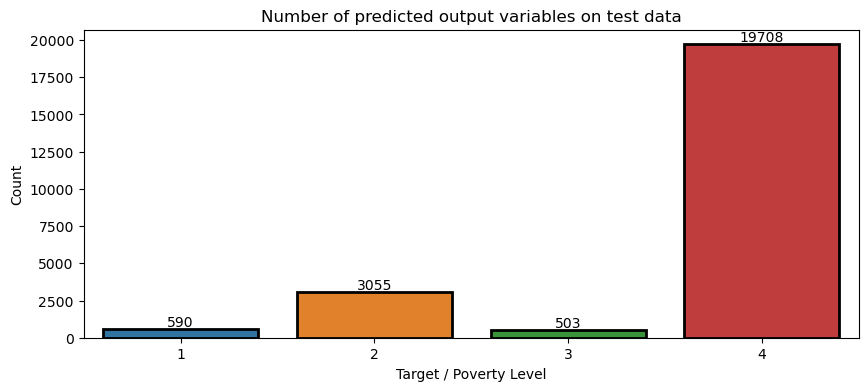

In [45]:
# Identify the output variable.
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(RFC_test_pred_data['Predicted_value'],ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('Target / Poverty Level')
plt.title('Number of predicted output variables on test data')
plt.show()

**Random Forest Accuracy Score on train data: 98.17%**

**Random Forest Accuracy Score on test data: 89.17%**